#Financial Analysis using Regressions

Regression analysis is one of the most frequently used tools in the world of finance. It quantifies the relationship between a variable (dependent variable / the target / y) and one or more explanatory variables (independent variable(s) / x).

Types of Regressions:
1. *Simple Regressions*
  * y_i = beta_0 + beta_1 * x_1 + epsilon_i
  * assumes the existence of a linear relationship between two variables
  * a straight line is the best fit; helps describe the rapport between all the data points in a plot
  * i.e. y = house price x = house size 

2. *Multivariate Regressions*
  * y_i = beta_0 + beta_1 * x_1 + beta_2 * x_2 + beta_3 * x_3 + epsilon_i
  * considers more variables in the regression equation to improve the explanatory power and provide a better picture of circumstances that contribute to the predictive variable (the target).


In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd

# Statistical Analysis API
from scipy import stats
import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import housing data from Excel Spreadsheet
housing_data = pd.read_excel('/content/drive/MyDrive/Finance_Investment/Housing.xlsx')
housing_data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [ ]:
# Review the House Price and House Size 
housing_data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


##Univariate Regression

In [ ]:
# Set independent (X) and dependent (Y) variables
X = housing_data['House Size (sq.ft.)']
Y = housing_data['House Price']
X, Y

(0     1940
 1     1300
 2     1420
 3     1680
 4     1270
 5     1850
 6     1000
 7     1100
 8     1600
 9     1000
 10    2150
 11    1900
 12    2200
 13    1100
 14     860
 15    1325
 16    1350
 17    1600
 18     950
 19    1250
 Name: House Size (sq.ft.), dtype: int64, 0     1116000
 1      860000
 2      818400
 3     1000000
 4      640000
 5     1010000
 6      600000
 7      700000
 8     1100000
 9      570000
 10     860000
 11    1085000
 12    1250000
 13     850000
 14     640000
 15     900000
 16     730000
 17     750000
 18     650000
 19     680000
 Name: House Price, dtype: int64)

In [ ]:
# Evaluate the max and min of X and Y
X.min(), X.max(), Y.min(), Y.max()

(860, 2200, 570000, 1250000)

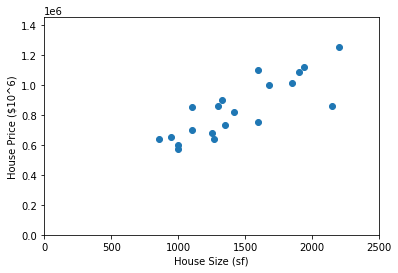

In [ ]:
# Visualize X and Y in a scatter plot
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1450000])
plt.xlabel('House Size (sf)')
plt.ylabel('House Price ($10^6)')
plt.show();

Best fitting line helps to minimize residuals.

>>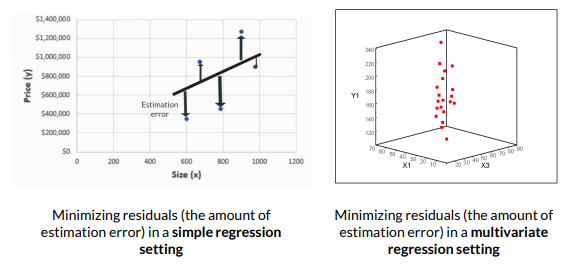





**Ordinary Least Square (OLS) Estimates** - coefficient found with determining residuals
  * Y = alpha + beta * X + error

Statisticians utilize a quantitative tool (**R^2**) to determine how good is a regression.
 * R^2 = 1 - (SSR/TSS)
   * varies between 0-100%; higher it is, the more predictive power of the model

**Total Sum of Squares (TSS)** - provides a sense of variabiliy of data
  * TSS = Sum[x -x_bar]^2 = SSE + SSR
   * SSE = Sum of the Squares 
   * SSR = Sum of the Squared Residuals (unexplained)

In [ ]:
# Statistical Analysis of the Regression
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()   # Ordinary Least Square (OLS) Estimates

reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           8.13e-06
Time:                        15:11:02   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the Statistical Analysis Summary, it is inferred that the expected value of Y can be evaluated from the following equation:

>Y = 2.608 * 10^5 + (402 * X)

In [ ]:
# Evaluate the House Price for a square footage (X) of 1,000
(2.608 * pow(10,5)) + (402 * 1000)

662800.0

In [ ]:
# Direct sourcing of statistical analysis variables
slope, intercept, R_value, p_value, std_err = stats.linregress(X,Y)
print('Slope (beta) = ', slope)
print('Intercept (alpha) = ', intercept)
print('R-squared = ', pow(R_value, 2))
print('P-value = ', p_value)
print('Standard Error = ', std_err)

Slope (beta) =  401.91628631922595
Intercept (alpha) =  260806.2360560964
R-squared =  0.678279986579124
P-value =  8.129642377231308e-06
Standard Error =  65.24299510636492


## Multivariate Regressions

Considering more explanatory variables (i.e. size, location, neighborhood).

Should provided predictions (targets) that are closer to the true results.

> Y_i = beta_0 + (beta_1 * X_1) + (beta_2 * X_2) +..+ (beta_i * x_i) + epsilon_i

Multiple beta coefficients and explanatory variables.


>Can determine if an explanatory variable improves a model's predictive power by the following procedures:
1. Run a regression with the variable (a)
  * calculated R-squared value
2. Run a regression without the variable (a) or with a new variable (b)
  * if R-squared values decreases, then variable a has good explanatory value

>Alternatively,...
1. Compare the p-values of beta coefficients 
  * the probability that the beta coefficients should have been different
  * a **low p-value** - there is a low chance that the beta coefficients are different than estimated
  - Example: a p-value lower than 5% means 95% confident that the beta coefficient estimated is different than 0

❗ **Beta coefficients estimated in a multivariate regression can be interpreted as the marginal impact of the explanatory variable** ❗ 

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
 # Import the housing data
housing_data = pd.read_excel('/content/drive/MyDrive/Finance_Investment/Housing.xlsx')
housing_data.head(), housing_data.tail()

(   House Price  House Size (sq.ft.)  ... Number of Rooms  Year of Construction
 0      1116000                 1940  ...               8                  2002
 1       860000                 1300  ...               5                  1992
 2       818400                 1420  ...               6                  1987
 3      1000000                 1680  ...               7                  2000
 4       640000                 1270  ...               5                  1995
 
 [5 rows x 5 columns],
     House Price  House Size (sq.ft.)  ... Number of Rooms  Year of Construction
 15       900000                 1325  ...               6                  1997
 16       730000                 1350  ...               6                  2000
 17       750000                 1600  ...               6                  1992
 18       650000                  950  ...               2                  1987
 19       680000                 1250  ...               4                  2000
 
 [5 row

**Provide Insights Regarding:**
1. Does the `House Size (sq.ft.)`, `Number of Rooms` and `Year of Construction` have any effect on the price of housing?


####Independent Variable: `House Size(sq.ft.)`, `Number of Rooms`, and `Year of Construction`

In [6]:
# Declare the independent variables as X
X = housing_data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]

# Declare the dependent variables as Y
Y = housing_data['House Price']

# Review X and Y
X.head(), X.tail(), Y.head(), Y.tail()

(   House Size (sq.ft.)  Number of Rooms  Year of Construction
 0                 1940                8                  2002
 1                 1300                5                  1992
 2                 1420                6                  1987
 3                 1680                7                  2000
 4                 1270                5                  1995,
     House Size (sq.ft.)  Number of Rooms  Year of Construction
 15                 1325                6                  1997
 16                 1350                6                  2000
 17                 1600                6                  1992
 18                  950                2                  1987
 19                 1250                4                  2000,
 0    1116000
 1     860000
 2     818400
 3    1000000
 4     640000
 Name: House Price, dtype: int64,
 15    900000
 16    730000
 17    750000
 18    650000
 19    680000
 Name: House Price, dtype: int64)

In [7]:
# Run an Ordinary Least Squares (OLS) Regression
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           6.82e-05
Time:                        20:17:24   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Did the additional independent variables help improve the explanatory power?**

>Compare the R-squared values between the univariate regression and multivariate regression

>Univariate Regression: 
  * R-squared = 0.678

>Multivariate Regression: 
  * R-squared = 0.736
  * p-valuea > 5%, thus not statistically significant

>R-squared increase, thus the additional independent variables *could have increased* the explanatory power. Let's take a closer look to confirm.

### Independent Variables: `House Size (sq.ft.)` and `Number of Rooms`

In [21]:
# Declare new set of independent variables 
X_1 = housing_data[['House Size (sq.ft.)', 'Number of Rooms']]
Y_1 = housing_data['House Price']
X_1.head(), X_1.tail()

(   House Size (sq.ft.)  Number of Rooms
 0                 1940                8
 1                 1300                5
 2                 1420                6
 3                 1680                7
 4                 1270                5,
     House Size (sq.ft.)  Number of Rooms
 15                 1325                6
 16                 1350                6
 17                 1600                6
 18                  950                2
 19                 1250                4)

In [22]:
# Run OLS Regression with X_1 independent variables
X1_1 = sm.add_constant(X_1)
reg_1 = sm.OLS(Y_1, X1_1).fit()

reg_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           5.77e-05
Time:                        20:43:56   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Independent Variables: `House Size (sq.ft)` and `Year of Construction`

In [23]:
# Declare new set of independent variables 
X_2 = housing_data[['House Size (sq.ft.)', 'Year of Construction']]
Y_2 = housing_data['House Price']
X_2.head(), X_2.tail()

(   House Size (sq.ft.)  Year of Construction
 0                 1940                  2002
 1                 1300                  1992
 2                 1420                  1987
 3                 1680                  2000
 4                 1270                  1995,
     House Size (sq.ft.)  Year of Construction
 15                 1325                  1997
 16                 1350                  2000
 17                 1600                  1992
 18                  950                  1987
 19                 1250                  2000)

In [24]:
# Run OLS regression wit X_3 independent variables
X1_2 = sm.add_constant(X_2)
reg_2 = sm.OLS(Y_2, X1_2).fit()

reg_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.26e-05
Time:                        20:44:26   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Independent Variables: `Number of Rooms` and `Year of Construction`

In [27]:
# Declare new set of independent variables 
X_3 = housing_data[['Number of Rooms', 'Year of Construction']]
Y_3 = housing_data['House Price']
X_3.head(), X_3.tail()

(   Number of Rooms  Year of Construction
 0                8                  2002
 1                5                  1992
 2                6                  1987
 3                7                  2000
 4                5                  1995,
     Number of Rooms  Year of Construction
 15                6                  1997
 16                6                  2000
 17                6                  1992
 18                2                  1987
 19                4                  2000)

In [28]:
# Run OLS regression wit X_3 independent variables
X1_3 = sm.add_constant(X_3)
reg_3 = sm.OLS(Y_3, X1_3).fit()

reg_3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           6.79e-05
Time:                        20:46:41   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Year of Construction` 
 * p-value was consistently on the higher spectrum in each of the regressions, thus not related to house prices.

`House Size`
  * p-value was not consistently low, thus cannot make a confirm determination if it has an effect on house prices

`Number of Rooms`
  * p-value was not consistently low, thus cannot make a confirm determination if it has an effect on house prices

### Next Steps: Gather more observations

* The p-values of `House Size` and `Number of Rooms` might decrease, because the R-squared values remained relatively high which gives confidence that in general, the set of explanatory variables are satisfactory.

* `House Size` and `Number of Rooms` might be related. Therefore, are essentially the same factor.

* Gather more explanatory variables (i.e. distance of house to downtown, number of train stations nearby, etc.)

Importance of Regressions for Financial Analysis:
1. Regressions can give a great direction for future research!
2. Regressions are invaluable when studying historical data to predict future behavior!